In [4]:
# include necessary packages
using HDF5
using JLD
using PolicyViz

#Load Q data
#Uncomment if you want to load Q data
q = h5open("/home/sisl/kyle/notebooks/Reshaped_Q.h5", "r") do file
    read(file, "Q")
end
q = q';

## Visualize Regressed ACAS Xu Policies
#### Inputs: 
* **neuralNetworkPath** - path to the .nnet file you want to visualize
* **q** - data for the score table. This input is optional


#### Outputs: Interactive Plots

##### Interactive Settings:
* **psi_int**: Intruder relative heading angle
* **v_own**:   Ownship speed
* **v_int**:   Intruder speed
* **tau**:     Time to minimum vertical separation
* **pa**:      Previous advisory. Note that these are indices to the advisory array: [0.0, 1.5, -1.5, 3.0, -3.0]
* **zoom**:    A zoom scaling factor used in plotting. 4 is most zoomed in, while 1 has no zoom
* **nbin**:    The number of bins being plotted. Higher nbin means better resolution, but that takes longer to compute
* **Interp**:  Boolean, true means the score table is interpolated at each point, false means it uses nearest neighbor
* **Belief**:  Boolean, true means the Q values at each point are averaged between the given point and neighboring points +/- a standard deviation in R, Theta, Intruder Heading, and Intrudedr Speed. The remaining inputs only matter when Belief is true
* **beliefProb**: Probability of nominal state. The remaining probability is divided equally among the 8 other points
* **deltaR**: Standard Deviation in Range. The first option is standard, but other options are included as well
* **deltaTh**: Standared deviation in bearing to intruder relative to ownship heading.
* **deltaPsi**: Standard deviation in intruder heading relative to ownship heading
* **deltaV**: Standard deviation in intruder velocity
* **worst**: If this is set to true, then the Q-values are not averaged, but rather the set of Q values with the worst optimal action is chosen. 

Interact.Options{:ToggleButtons,Int32}(Signal{Int32}(-180, nactions=0),"psi_int",-180,"-180",Interact.OptionDict(Any["-180","-171","-162","-153","-144","-135","-126","-117","-108","-99"  …  "99","108","117","126","135","144","153","162","171","180"],Dict{Any,Any}("-135"=>-135,"-99"=>-99,"81"=>81,"54"=>54,"171"=>171,"117"=>117,"144"=>144,"-45"=>-45,"-126"=>-126,"-90"=>-90,"-9"=>-9,"-18"=>-18,"-117"=>-117,"-108"=>-108,"27"=>27,"-81"=>-81,"-27"=>-27,"-180"=>-180,"90"=>90,"108"=>108,"162"=>162,"72"=>72,"63"=>63,"-144"=>-144,"45"=>45,"-162"=>-162,"-153"=>-153,"-72"=>-72,"36"=>36,"-171"=>-171,"126"=>126,"99"=>99,"-36"=>-36,"0"=>0,"135"=>135,"-54"=>-54,"-63"=>-63,"9"=>9,"18"=>18,"180"=>180,"153"=>153)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(100, nactions=0),"v_own",100,"100",Interact.OptionDict(Any["100","200","300","400","500","600","700","800"],Dict{Any,Any}("300"=>300,"400"=>400,"600"=>600,"800"=>800,"700"=>700,"100"=>100,"200"=>200,"500"=>500)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(0, nactions=0),"v_int",0,"0",Interact.OptionDict(Any["0","100","200","300","400","500","600","700","800"],Dict{Any,Any}("300"=>300,"400"=>400,"600"=>600,"0"=>0,"800"=>800,"700"=>700,"100"=>100,"200"=>200,"500"=>500)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(0, nactions=0),"tau",0,"0",Interact.OptionDict(Any["0","1","5","10","20","40","60","80","100"],Dict{Any,Any}("40"=>40,"1"=>1,"80"=>80,"20"=>20,"5"=>5,"0"=>0,"10"=>10,"100"=>100,"60"=>60)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"pa",1,"1",Interact.OptionDict(Any["1","2","3","4","5"],Dict{Any,Any}("4"=>4,"1"=>1,"5"=>5,"2"=>2,"3"=>3)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(4, nactions=0),"zoom",4,"4",Interact.OptionDict(Any["4","3","2","1"],Dict{Any,Any}("4"=>4,"1"=>1,"2"=>2,"3"=>3)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(100, nactions=0),"nbin",100,"100",Interact.OptionDict(Any["100","150","200","250"],Dict{Any,Any}("250"=>250,"100"=>100,"150"=>150,"200"=>200)),Any[],Any[])

Interact.Options{:ToggleButtons,Bool}(Signal{Bool}(false, nactions=0),"Interp",false,"false",Interact.OptionDict(Any["false","true"],Dict{Any,Any}("true"=>true,"false"=>false)),Any[],Any[])

Interact.Options{:ToggleButtons,Bool}(Signal{Bool}(false, nactions=0),"Belief",false,"false",Interact.OptionDict(Any["false","true"],Dict{Any,Any}("true"=>true,"false"=>false)),Any[],Any[])

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(0.333, nactions=0),"beliefProb",0.333,"0.333",Interact.OptionDict(Any["0.333","0.111","0.01"],Dict{Any,Any}("0.01"=>0.01,"0.111"=>0.111,"0.333"=>0.333)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(40, nactions=0),"deltaR",40,"40",Interact.OptionDict(Any["40","400","4000","0"],Dict{Any,Any}("40"=>40,"400"=>400,"0"=>0,"4000"=>4000)),Any[],Any[])

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(5.0, nactions=0),"deltaTh",5.0,"5.0",Interact.OptionDict(Any["5.0","30.0","60.0","0.0"],Dict{Any,Any}("60.0"=>60.0,"0.0"=>0.0,"30.0"=>30.0,"5.0"=>5.0)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(5, nactions=0),"deltaPsi",5,"5",Interact.OptionDict(Any["5","30","60","90","0"],Dict{Any,Any}("5"=>5,"0"=>0,"90"=>90,"30"=>30,"60"=>60)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(10, nactions=0),"deltaV",10,"10",Interact.OptionDict(Any["10","100","200","0"],Dict{Any,Any}("10"=>10,"0"=>0,"100"=>100,"200"=>200)),Any[],Any[])

Interact.Options{:ToggleButtons,Bool}(Signal{Bool}(false, nactions=0),"worst",false,"false",Interact.OptionDict(Any["false","true"],Dict{Any,Any}("true"=>true,"false"=>false)),Any[],Any[])

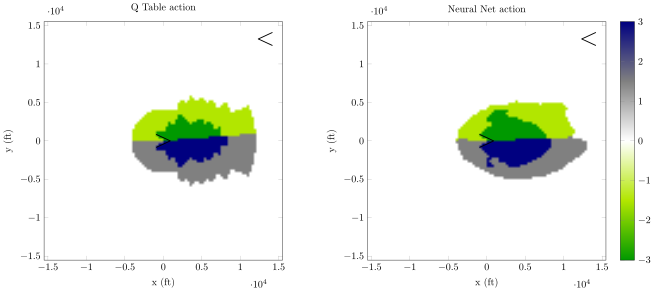

In [5]:
#ACAS Xu Regression
neuralNetworkPath = "/home/sisl/kyle/data/nnet/ACASXU_ADAMAX_customLoss_900_norm.nnet"
viz_policy(q,neuralNetworkPath)

## Visualize Deep RL ACAS Xu Policies
#### Inputs: 
* **neuralNetworkPath** - path to the .nnet file you want to visualize
* **q** - data for the score table. This input is optional


#### Outputs: Interactive Plots

##### Interactive Settings:
* **psi_int**: Intruder relative heading angle
* **v_own**:   Ownship speed
* **v_int**:   Intruder speed
* **zoom**:    A zoom scaling factor used in plotting. 4 is most zoomed in, while 1 has no zoom
* **nbin**:    The number of bins being plotted. Higher nbin means better resolution, but that takes longer to compute
* **interp**:  Boolean, true means the score table is interpolated at each point, false means it uses nearest neighbor

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(-180.0, nactions=0),"psi_int",-180.0,"-180.0",Interact.OptionDict(Any["-180.0","-171.0","-162.0","-153.0","-144.0","-135.0","-126.0","-117.0","-108.0","-99.0"  …  "99.0","108.0","117.0","126.0","135.0","144.0","153.0","162.0","171.0","180.0"],Dict{Any,Any}("-153.0"=>-153.0,"-90.0"=>-90.0,"9.0"=>9.0,"-36.0"=>-36.0,"45.0"=>45.0,"-54.0"=>-54.0,"-72.0"=>-72.0,"117.0"=>117.0,"162.0"=>162.0,"-162.0"=>-162.0,"126.0"=>126.0,"153.0"=>153.0,"-45.0"=>-45.0,"-144.0"=>-144.0,"-63.0"=>-63.0,"27.0"=>27.0,"-180.0"=>-180.0,"54.0"=>54.0,"-18.0"=>-18.0,"90.0"=>90.0,"18.0"=>18.0,"-126.0"=>-126.0,"171.0"=>171.0,"108.0"=>108.0,"-99.0"=>-99.0,"135.0"=>135.0,"144.0"=>144.0,"-171.0"=>-171.0,"-108.0"=>-108.0,"-117.0"=>-117.0,"72.0"=>72.0,"-27.0"=>-27.0,"36.0"=>36.0,"81.0"=>81.0,"-81.0"=>-81.0,"-135.0"=>-135.0,"180.0"=>180.0,"0.0"=>0.0,"63.0"=>63.0,"-9.0"=>-9.0,"99.0"=>99.0)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(10, nactions=0),"v_own",10,"10",Interact.OptionDict(Any["10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}("12"=>12,"20"=>20,"11"=>11,"13"=>13,"15"=>15,"16"=>16,"14"=>14,"17"=>17,"10"=>10,"19"=>19,"18"=>18)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(10, nactions=0),"v_int",10,"10",Interact.OptionDict(Any["10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}("12"=>12,"20"=>20,"11"=>11,"13"=>13,"15"=>15,"16"=>16,"14"=>14,"17"=>17,"10"=>10,"19"=>19,"18"=>18)),Any[],Any[])

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(4.0, nactions=0),"zoom",4.0,"4.0",Interact.OptionDict(Any["4.0","3.0","2.0","1.5","1.0"],Dict{Any,Any}("2.0"=>2.0,"3.0"=>3.0,"1.5"=>1.5,"4.0"=>4.0,"1.0"=>1.0)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(100, nactions=0),"nbin",100,"100",Interact.OptionDict(Any["100","150","200","250"],Dict{Any,Any}("250"=>250,"100"=>100,"150"=>150,"200"=>200)),Any[],Any[])

Interact.Options{:ToggleButtons,Bool}(Signal{Bool}(true, nactions=0),"interp",true,"true",Interact.OptionDict(Any["true","false"],Dict{Any,Any}("true"=>true,"false"=>false)),Any[],Any[])

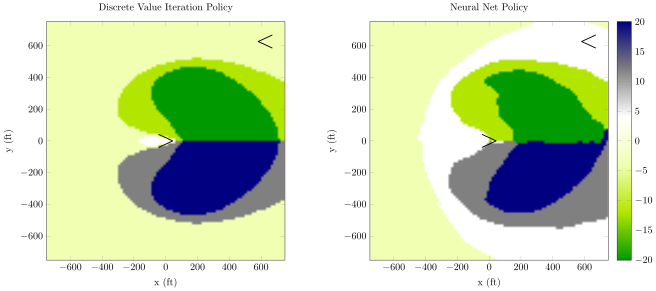

In [7]:
#Deep RL compared to polar Discrete Value Iteration
neuralNetworkPath = "/home/sisl/kyle/data/nnet/DRL_ReducedPen_AlwaysExplore_TriangleRewards_74000.nnet"
solQ = load("../../coord/src/MDP_ReducedPenConflict_radialPoints_More_fine.jld", "solQ")
solQ = solQ'
viz_policy_drl(neuralNetworkPath,solQ)

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(-180.0, nactions=0),"psi_int",-180.0,"-180.0",Interact.OptionDict(Any["-180.0","-171.0","-162.0","-153.0","-144.0","-135.0","-126.0","-117.0","-108.0","-99.0"  …  "99.0","108.0","117.0","126.0","135.0","144.0","153.0","162.0","171.0","180.0"],Dict{Any,Any}("-153.0"=>-153.0,"-90.0"=>-90.0,"9.0"=>9.0,"-36.0"=>-36.0,"45.0"=>45.0,"-54.0"=>-54.0,"-72.0"=>-72.0,"117.0"=>117.0,"162.0"=>162.0,"-162.0"=>-162.0,"126.0"=>126.0,"153.0"=>153.0,"-45.0"=>-45.0,"-144.0"=>-144.0,"-63.0"=>-63.0,"27.0"=>27.0,"-180.0"=>-180.0,"54.0"=>54.0,"-18.0"=>-18.0,"90.0"=>90.0,"18.0"=>18.0,"-126.0"=>-126.0,"171.0"=>171.0,"108.0"=>108.0,"-99.0"=>-99.0,"135.0"=>135.0,"144.0"=>144.0,"-171.0"=>-171.0,"-108.0"=>-108.0,"-117.0"=>-117.0,"72.0"=>72.0,"-27.0"=>-27.0,"36.0"=>36.0,"81.0"=>81.0,"-81.0"=>-81.0,"-135.0"=>-135.0,"180.0"=>180.0,"0.0"=>0.0,"63.0"=>63.0,"-9.0"=>-9.0,"99.0"=>99.0)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(10, nactions=0),"v_own",10,"10",Interact.OptionDict(Any["10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}("12"=>12,"20"=>20,"11"=>11,"13"=>13,"15"=>15,"16"=>16,"14"=>14,"17"=>17,"10"=>10,"19"=>19,"18"=>18)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(10, nactions=0),"v_int",10,"10",Interact.OptionDict(Any["10","11","12","13","14","15","16","17","18","19","20"],Dict{Any,Any}("12"=>12,"20"=>20,"11"=>11,"13"=>13,"15"=>15,"16"=>16,"14"=>14,"17"=>17,"10"=>10,"19"=>19,"18"=>18)),Any[],Any[])

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(4.0, nactions=0),"zoom",4.0,"4.0",Interact.OptionDict(Any["4.0","3.0","2.0","1.5","1.0"],Dict{Any,Any}("2.0"=>2.0,"3.0"=>3.0,"1.5"=>1.5,"4.0"=>4.0,"1.0"=>1.0)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(100, nactions=0),"nbin",100,"100",Interact.OptionDict(Any["100","150","200","250"],Dict{Any,Any}("250"=>250,"100"=>100,"150"=>150,"200"=>200)),Any[],Any[])

Interact.Options{:ToggleButtons,Bool}(Signal{Bool}(true, nactions=0),"interp",true,"true",Interact.OptionDict(Any["true","false"],Dict{Any,Any}("true"=>true,"false"=>false)),Any[],Any[])

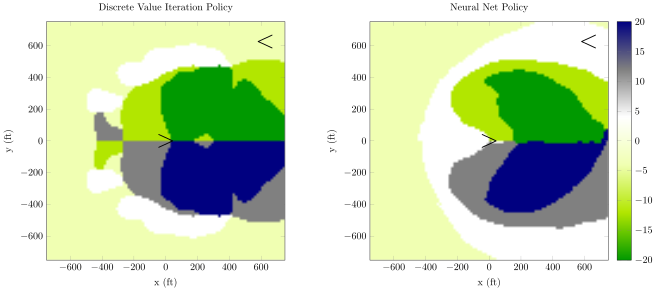

In [9]:
#Deep RL compared to rectangular Discrete Value Iteration
neuralNetworkPath = "/home/sisl/kyle/data/nnet/DRL_ReducedPen_AlwaysExplore_TriangleRewards_74000.nnet"
solQ = load("../../coord/src/MDP_ReducedPenConflict_71_100.jld", "solQ")
solQ = solQ'
viz_policy_drl(neuralNetworkPath,solQ,XandY=true)